In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/34 no.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/N15.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/no 1.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/6 no.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/46 no.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/no 90.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/N22.JPG
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/No12.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/11 no.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/N11.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/no 98.jpg
/kaggle/input/brain-tumor-ct-images-binary-classification/split/val/no/18 no.jpg
/kaggle/input/brain-tumor-ct-images-b

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1/255)

train=datagen.flow_from_directory('/kaggle/input/brain-tumor-ct-images-binary-classification/split/train',
                                 target_size=(64,64),
                                 class_mode='binary')
val=datagen.flow_from_directory('/kaggle/input/brain-tumor-ct-images-binary-classification/split/val',
                                 target_size=(64,64),
                                 class_mode='binary')
test=datagen.flow_from_directory('/kaggle/input/brain-tumor-ct-images-binary-classification/split/test',
                                 target_size=(64,64),
                                 class_mode='binary')

2024-06-23 16:27:49.720704: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 16:27:49.720974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 16:27:49.893056: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 174 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D

model=Sequential()
model.add(Conv2D(32,(3,3),
                activation='relu', input_shape=(64,64,3)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,872,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,873,537 (30.04 MB)

 Trainable params: 7,873,537 (30.04 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.fit(train,
         batch_size=32,
         epochs=20,
         validation_data=val)
model.save('mribrain_model.h5')

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.5675 - loss: 2.2032 - val_accuracy: 0.6122 - val_loss: 1.2888
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6863 - loss: 1.1245 - val_accuracy: 0.6939 - val_loss: 0.6303
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.7356 - loss: 0.5087 - val_accuracy: 0.7959 - val_loss: 0.4686
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.8297 - loss: 0.4394 - val_accuracy: 0.7755 - val_loss: 0.4282
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.8991 - loss: 0.3244 - val_accuracy: 0.8571 - val_loss: 0.4066
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.9190 - loss: 0.2128 - val_accuracy: 0.7959 - val_loss: 0.4186
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9232 - loss: 0.1645 - val_accuracy: 0.7959 - val_loss: 0.3920
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9716 - loss: 0.0875 - val_accuracy: 0.8163 - val_loss: 0.4350
Epo

In [5]:
y_true=test.classes

In [6]:
y_pred=model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


In [7]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [8]:
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)

0.5

In [9]:
metrics.confusion_matrix(y_true,y_pred)

array([[ 4,  7],
       [ 7, 10]])

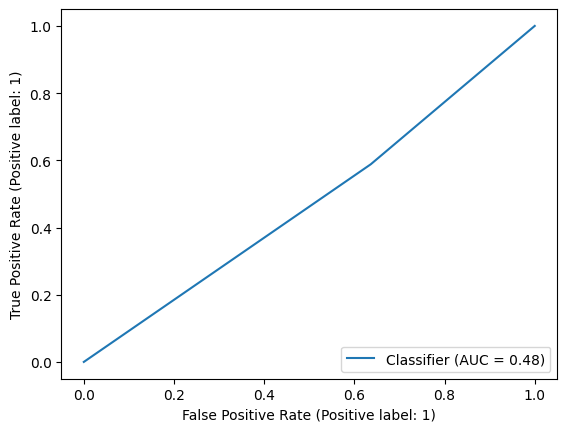

In [10]:
metrics.RocCurveDisplay.from_predictions(y_true,y_pred)

In [11]:
metrics

<module 'sklearn.metrics' from '/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py'>